In [10]:
import pandas as pd

data = pd.read_csv('U4_01_housing.csv')

In [11]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

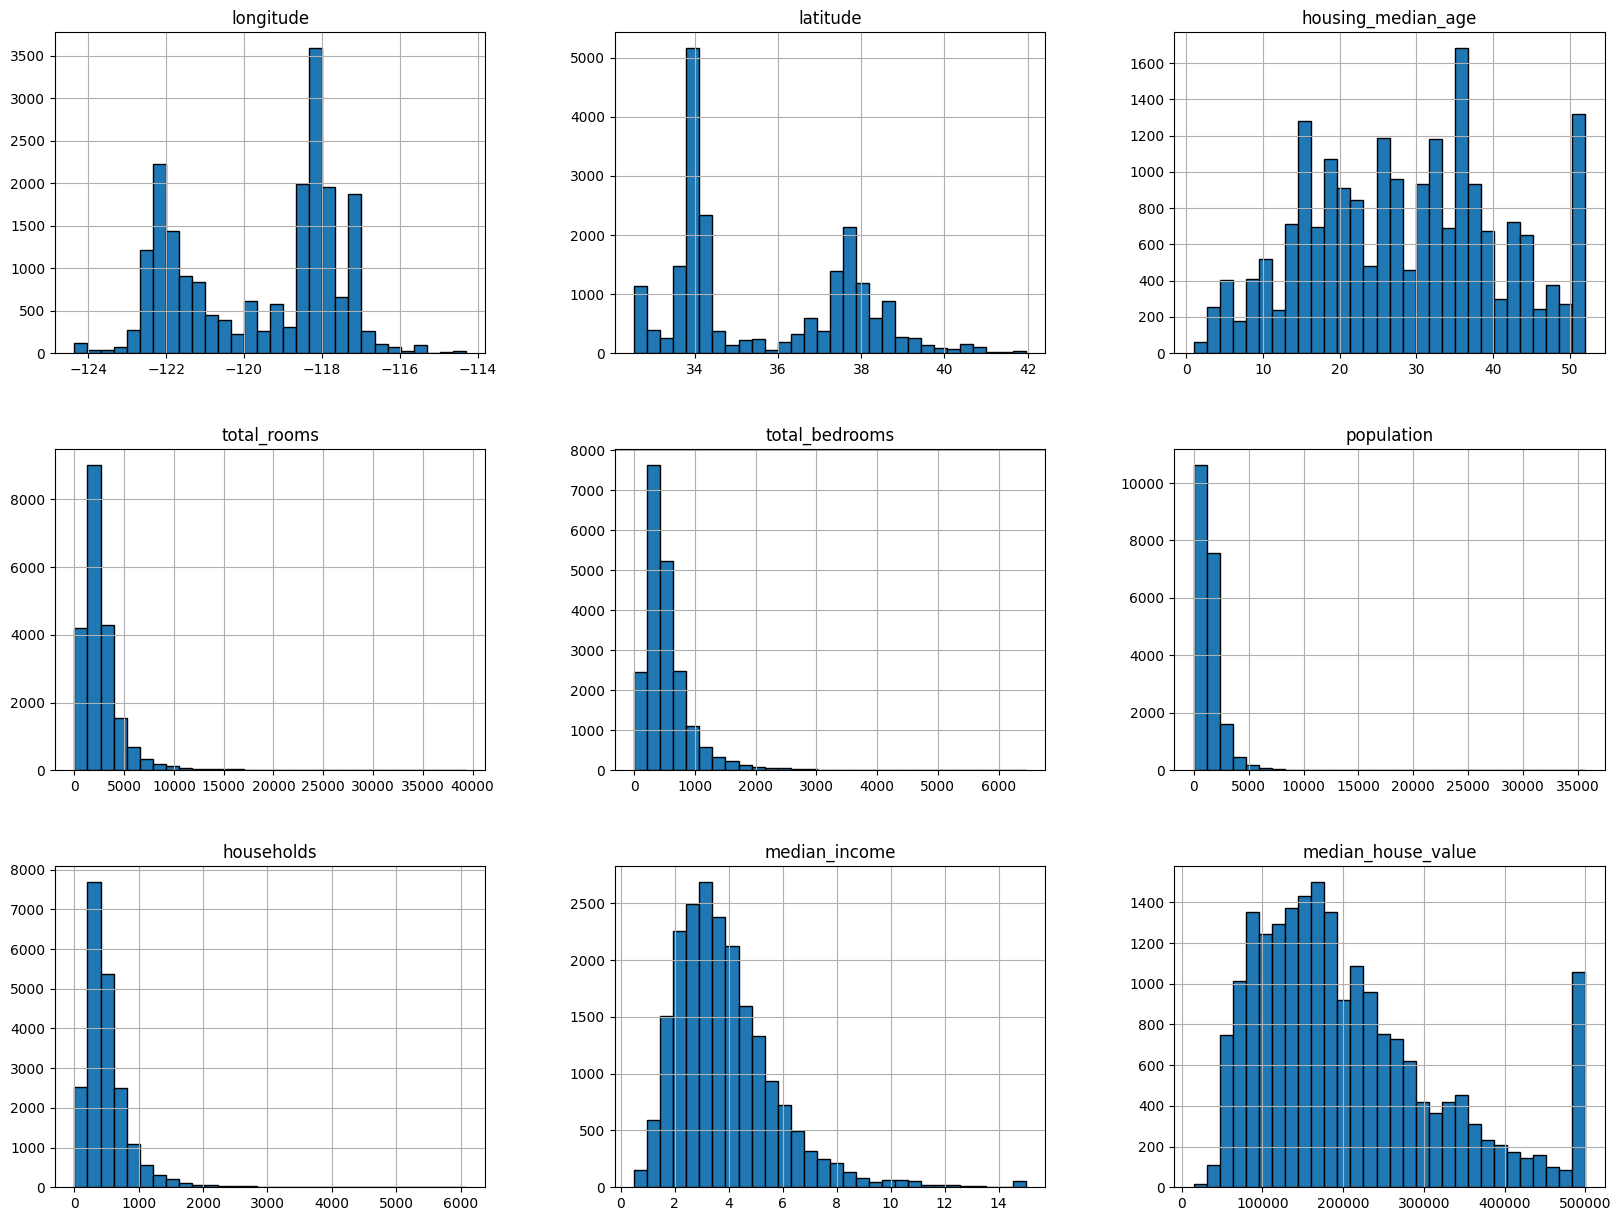

In [15]:
data.hist(bins=30, figsize=(20,15), edgecolor='black')

TypeError: cannot convert the series to <class 'float'>

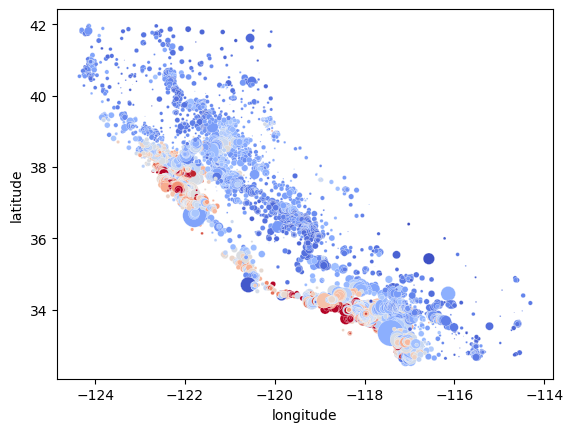

In [16]:
import seaborn as sb

sb.scatterplot(data=data, 
               x='longitude', 
               y='latitude',  
               hue='median_house_value', 
               palette='coolwarm',
               s=data['population'] /100
               ) 

<Axes: xlabel='longitude', ylabel='latitude'>

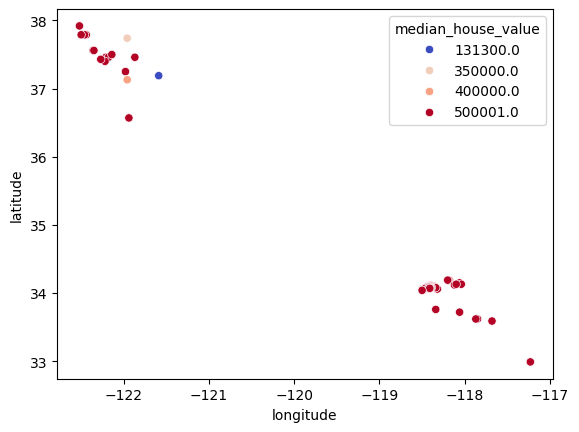

In [17]:
sb.scatterplot(
              data=data[(data.median_income > 14)], 
               x='longitude', 
               y='latitude',  
               hue='median_house_value', 
               palette='coolwarm',
               ) 

In [18]:
data_na = data.dropna()

In [19]:
dummies = pd.get_dummies(data_na['ocean_proximity'], dtype=int)

In [20]:
data_na = data_na.join(dummies)

In [21]:
data_na.drop('ocean_proximity', axis=1, inplace=True)

In [22]:
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

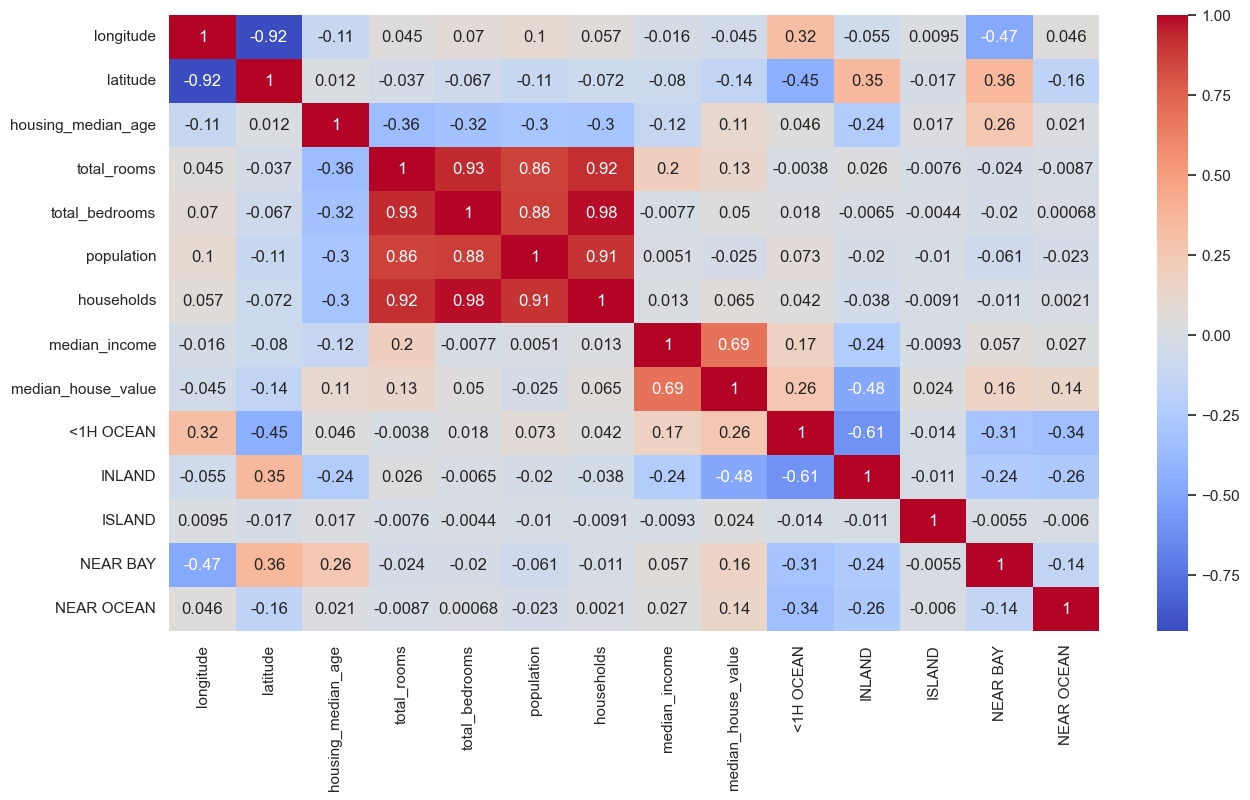

In [23]:
sb.set_theme(rc={'figure.figsize':(15, 8)})
sb.heatmap(data_na.corr(), annot=True, cmap='coolwarm')

In [24]:
data_na.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

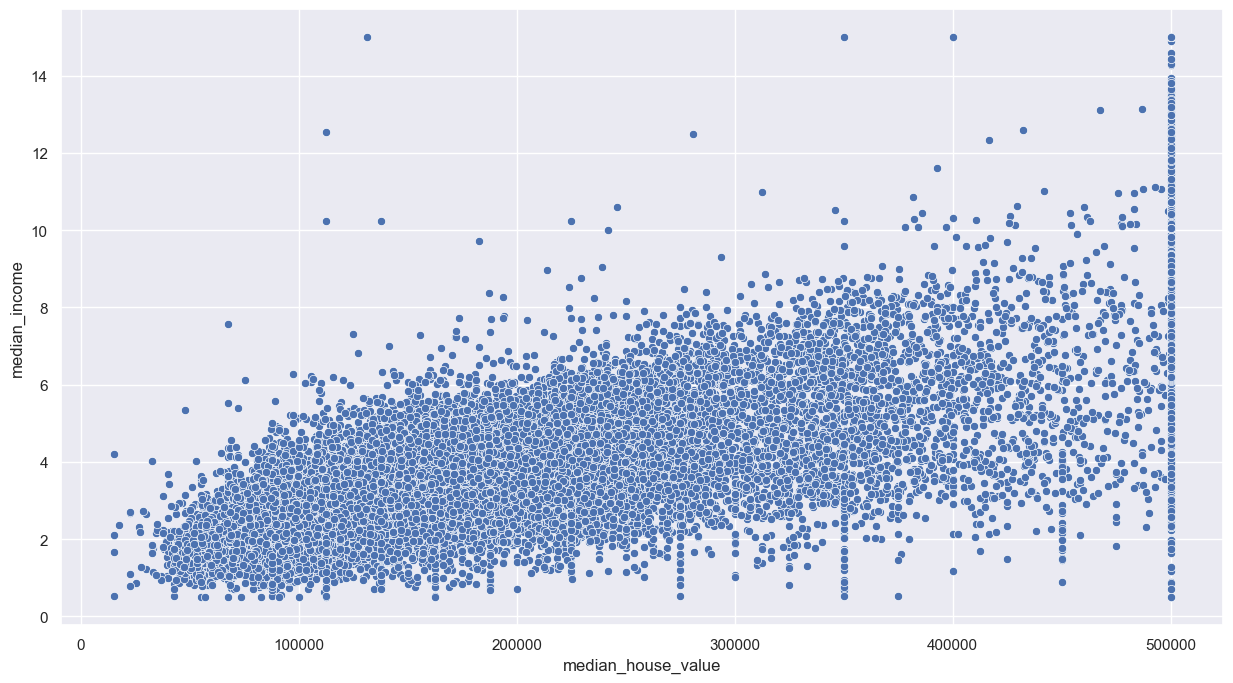

In [27]:
sb.scatterplot(x=data_na["median_house_value"], y=data_na["median_income"])



In [28]:
data_na['bedroom_ratio'] = data_na['total_bedrooms'] / data_na['total_rooms']

<Axes: >

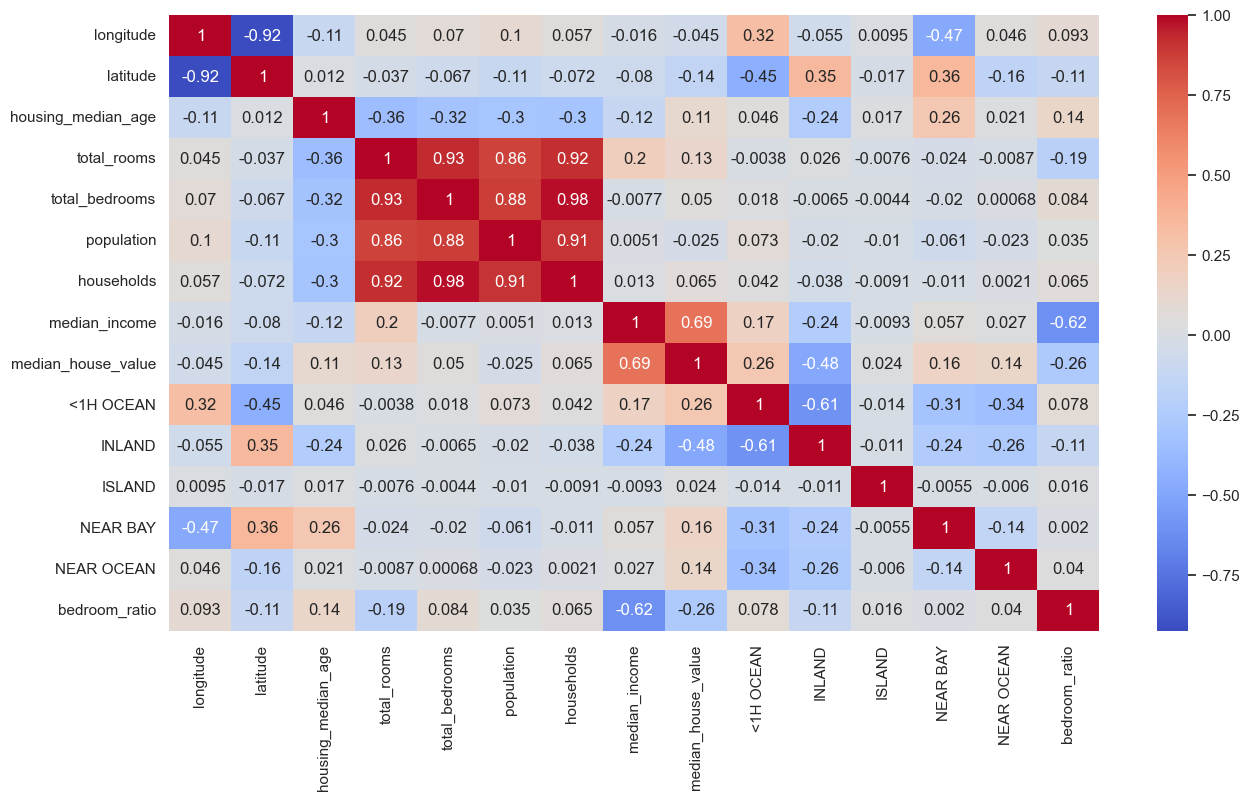

In [29]:
sb.set_theme(rc={'figure.figsize':(15, 8)})
sb.heatmap(data_na.corr(), annot=True, cmap='coolwarm')

In [31]:
#split labels and features


X = data_na.drop('median_house_value', axis=1)
y = data_na['median_house_value']

# split data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 14), (4087, 14), (16346,), (4087,))

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
predictions = model.predict(X_test)

In [36]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

,Actual,Predicted
7252,137500.0,139954.428320
7876,168200.0,209974.928063
13792,130900.0,111189.511662
20054,62600.0,67802.885794
908,275100.0,287655.131528
...,...,...
5166,105600.0,196618.151665
19805,67500.0,156289.980106
13943,255200.0,237301.640060
7035,162800.0,177790.805810


In [37]:
# Overfitting and underfitting
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6473721430062215
0.6706221301088358


In [39]:
# Error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)

rmse

65948.41644289065

In [40]:
#Scaler 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [41]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.618562,-0.773483,0.744926,0.188326,0.600516,0.625231,0.566541,-1.069861,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,0.814408
1,0.633503,-0.759459,1.540186,0.710660,1.303346,1.615912,1.156232,-1.033952,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,0.810710
2,0.663384,-0.806206,0.744926,-0.860867,-0.913271,-0.613769,-0.884411,-1.055181,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,-0.156778
3,-1.129482,0.811247,-0.050335,-0.483375,-0.473709,-0.154335,-0.385242,0.152261,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,0.028698
4,-1.502995,1.311443,-1.163700,-0.444449,-0.353828,-0.800658,-0.398174,-0.364460,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,0.368513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-1.423313,1.016935,0.824452,0.284283,0.696891,-0.253836,0.576886,-0.055589,-0.888361,-0.681108,-0.017492,2.812099,-0.385616,0.739574
16342,-0.262930,1.652697,0.347295,-0.361165,-0.367932,-1.048977,-1.060284,-1.143211,-0.888361,1.468196,-0.017492,-0.355606,-0.385616,-0.093254
16343,0.762987,-0.708037,0.108717,-0.215872,-0.523071,-0.386215,-0.499043,0.960267,-0.888361,1.468196,-0.017492,-0.355606,-0.385616,-1.156378
16344,0.608602,-0.806206,-0.766070,-0.315902,0.043424,-0.128379,-0.010219,-0.576587,1.125668,-0.681108,-0.017492,-0.355606,-0.385616,1.282843


In [42]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [43]:
predictions = model.predict(X_test_scaled)


In [44]:
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

,Actual,Predicted
7252,137500.0,139954.428320
7876,168200.0,209974.928063
13792,130900.0,111189.511662
20054,62600.0,67802.885794
908,275100.0,287655.131528
...,...,...
5166,105600.0,196618.151665
19805,67500.0,156289.980106
13943,255200.0,237301.640060
7035,162800.0,177790.805810
